# IT41 Practical Session 1  - Time complexity of algorithms

---



In this practical session we will illustrate the concept of time complexity and running time of algorithms that we discussed in class or in rectitation.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/bigO.jpeg'  width="440px" />    
    </tr>
</table>

Recall that the time complexity of an algorithm is a measure of the number of elementary operations done during the execution of the algorithm. By considering the asymptotic behavior of the running time one obtains a tool to define classes of algorithms in terms of their (asymptotic) efficiency.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/classes.png'  width="440px" />    
    </tr>
</table>


## IMPORTS

In [1]:
import time
import random
import math
import matplotlib.pyplot as plt
import numpy as np


---

## Time Complexity
Let's illustrate the different classes of complexity class trough some examples of algorithms. We will measure the time execution of several algorithms by using the following code

```Python
import time
main()
print("---%s seconds ---" % (time.time() - start_time))
```

### Constant complexity
An algorithm with class of complexity $\Theta(1)$ has a running time that does not depend on the size of the input data.

The running time will be identical no matter what the size of $T$ is.
Try this code with different choices of array $T$.
   

In [2]:
def print_first_element(T):
     start_time = time.time()
     print(T[0])
     print("--- %s seconds ---" % (time.time() - start_time))

### tests

In [3]:
test_array = [math.pi,"bonsoir",5,2,19,-10,'2',99,"hello"]
print_first_element(test_array)

3.141592653589793
--- 2.193450927734375e-05 seconds ---


To test and compare the following algorithms, you will need to produce random large arrays of integers.

The following two codes could be useful to generate those arrays.

In [4]:
def createRandomSortedList(num, start, end): 
    arr = [] 
    tmp = random.randint(start, end) 
      
    for x in range(num): 
          
        while tmp in arr: 
            tmp = random.randint(start, end) 
              
        arr.append(tmp) 
          
    arr.sort() 
      
    return arr 


def createRandomUnSortedList(num, start, end): 
    arr = [] 
    tmp = random.randint(start, end) 
      
    for x in range(num): 
          
        while tmp in arr: 
            tmp = random.randint(start, end) 
              
        arr.append(tmp) 
      
    return arr 

### tests

In [5]:
sorted_array1 = createRandomSortedList(5,0,10)
unsorted_array1 = createRandomUnSortedList(5,0,10)

print(sorted_array1)
print(unsorted_array1)

[1, 2, 6, 7, 8]
[2, 4, 1, 3, 7]


### Logarithmic complexity

An algorithm which has a complexity in $\Theta(\ln(n))$ does not explore the full size of the input data to solve the problem. Typically the $\ln(n)$ term indicates that the size of the input date is  probably reduced all along the algorithm (like in the Bisection algorithm in Practical Session 1).
Let us consider the following binary search algorithm.


Check that this algorithm is solving the problem: find 'value' in a sorted array 'data'.

Write an other algorithm which looks for 'value' in 'data' by accessing linearly all values of 'data'. What is the complexity of this second algorithm ?

Compare the excecution time of both algorithms on a selection of sorted array of increasing size. 

### *Answers* 

* The second algorithm has a worst case complexity of $\Theta(n)$ because we go through a whole array of $n$ elements.

In [6]:
def binary_search(data, value):
    n = len(data)
    left = 0
    right = n - 1
    while left <= right:
        middle = (left + right) // 2
        if value < data[middle]:
            right = middle - 1
        elif value > data[middle]:
            left = middle + 1
        else:
            return middle

## Other search algorithm

In [7]:
def linear_search(data, value):
    for i in range(len(data)):
        if data[i]==value:
            return i

### tests

In [8]:
random_size=random.randint(0,1000)

test_array2 = createRandomSortedList(random_size,0,1000)
print(test_array2)
random_value=random.randint(0,1000)
print("\nAlgorithms are looking for :",random_value)
print("\n--------------------\n")


start_time_binary = time.time()
print("\nBinary search result:",binary_search(test_array2, random_value))
print("--- %s seconds ---" % (time.time() - start_time_binary))

start_time_linear = time.time()
print("\nLinear search result:",linear_search(test_array2, random_value))
print("--- %s seconds ---" % (time.time() - start_time_linear))

print("\nLinear time is",start_time_linear/start_time_binary,"times bigger than binary\nThe time difference is :",start_time_linear-start_time_binary)

[4, 8, 13, 32, 39, 41, 57, 69, 81, 88, 99, 103, 112, 118, 137, 140, 151, 155, 156, 169, 179, 186, 197, 203, 208, 219, 233, 234, 239, 244, 248, 258, 268, 276, 283, 289, 293, 294, 301, 307, 310, 315, 320, 346, 347, 349, 355, 379, 387, 389, 397, 420, 427, 432, 436, 437, 442, 446, 482, 490, 498, 499, 508, 511, 513, 516, 540, 546, 556, 561, 570, 573, 592, 607, 613, 616, 617, 619, 639, 672, 691, 698, 714, 718, 720, 723, 730, 734, 743, 754, 775, 784, 795, 809, 813, 821, 832, 841, 850, 851, 859, 866, 883, 885, 897, 909, 914, 928, 929, 942, 952, 956, 958, 977, 992, 998]

Algorithms are looking for : 730

--------------------


Binary search result: 86
--- 2.8848648071289062e-05 seconds ---

Linear search result: 86
--- 2.6702880859375e-05 seconds ---

Linear time is 1.000000000000024 times bigger than binary
The time difference is : 4.1961669921875e-05


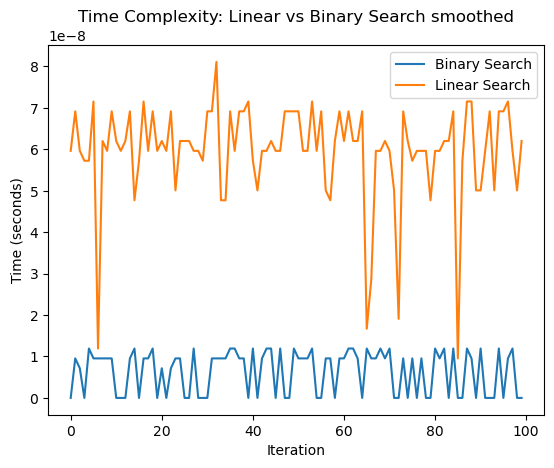

In [9]:

x = list(range(100))
y1 = []
y2 = []
repeat = 100
random_size=random.randint(0,1000)


for _ in range(100):
    test_array = createRandomSortedList(random_size, 0, 2000)
    random_value = random.randint(0, 2000)
    
    total_time_bs = 0
    for j in range (repeat):
        start_time = time.time()
        binary_search(test_array, random_value)
        total_time_bs = time.time() - start_time
    y1.append(total_time_bs/repeat)
    
    total_time_ls = 0
    for j in range (repeat):
        start_time = time.time()
        linear_search(test_array, random_value)
        total_time_ls = time.time() - start_time
    y2.append(total_time_ls/repeat)

# Plot results
plt.plot(x, y1, label="Binary Search")
plt.plot(x, y2, label="Linear Search")
plt.xlabel("Iteration")
plt.ylabel("Time (seconds)")
plt.title("Time Complexity: Linear vs Binary Search smoothed")
plt.legend()
plt.show()

### Linear complexity

Algorithms with a linear complexity are the best ones when the solution of your problem requires to examine all the values of your input data. This is the case of the linear seach of the previous question when you applied it to an unsorted array. 

### Quasilinear complexity

Implement Merge sort algortihm and test its running time for random arrays of increasing size (you can also plot the curve of the running time as a function of $n$)

In [10]:
def mergeSort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    leftHalf = arr[:mid]
    rightHalf = arr[mid:]

    sortedLeft = mergeSort(leftHalf)
    sortedRight = mergeSort(rightHalf)

    return merge(sortedLeft, sortedRight)

def merge(left, right):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])

    return result

In [11]:
unsortedArr = [3, 7, 6, -10, 15, 23.5, 55, -13]
sortedArr = mergeSort(unsortedArr)
print("{Merge} Sorted array:", sortedArr)

{Merge} Sorted array: [-13, -10, 3, 6, 7, 15, 23.5, 55]


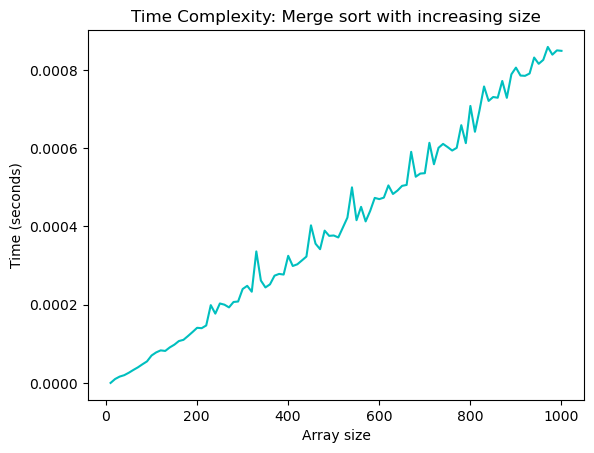

In [12]:
x = []
y1 = []

n = 1
repeat = 100


for i in range(100):
    test_array = createRandomUnSortedList(n, 0, 2000)
    

    start_time = time.time()
    mergeSort(test_array)
    y1.append(time.time() - start_time)
    

    n+=10
    x.append(n)

# Plot results
plt.plot(x, y1, color='c')
plt.xlabel("Array size")
plt.ylabel("Time (seconds)")
plt.title("Time Complexity: Merge sort with increasing size")
plt.show()

### Polynomial complexity

Implement the selection sort algorithm as seen in class and test its running time for random arrays of increasing size. For which size of arrays is Merge sort more efficient that Section sort ? 


* Theoretically, Merge Sort's time complexity is $O(n.log(n))$
* Selection sort's time complexity is $O(n^2)$


In [13]:
def selectionSort(arr):
    for i in range(0,len(arr)-1):
        jMin = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[jMin]:
                jMin = j
        if jMin != i:
            arr[i],arr[jMin]=arr[jMin],arr[i]
    return arr

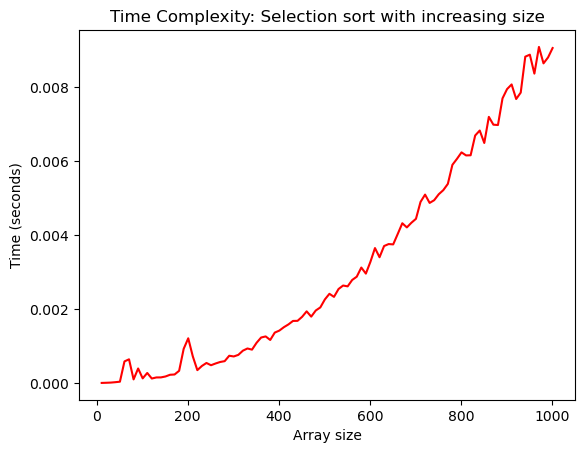

In [14]:
x = []
y1 = []

n = 1


for i in range(100):
    test_array = createRandomUnSortedList(n, 0, 2000)
    random_value = random.randint(0, 2000)
    
    start_time = time.time()
    selectionSort(test_array)
    y1.append(time.time() - start_time)
    

    n+=10
    x.append(n)

# Plot results
plt.plot(x, y1, color='r')
plt.xlabel("Array size")
plt.ylabel("Time (seconds)")
plt.title("Time Complexity: Selection sort with increasing size")
plt.show()

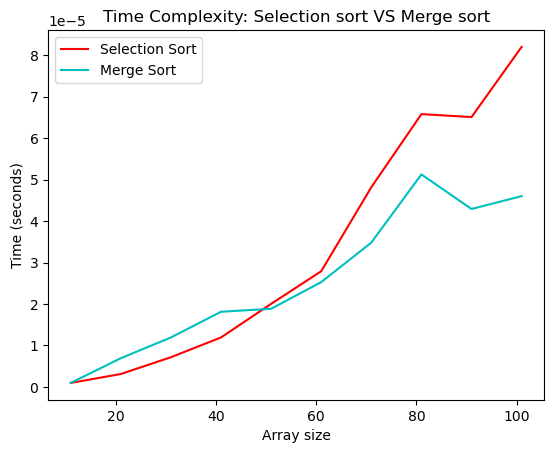

In [15]:
x = []
y1 = []
y2 = []

n = 1


for i in range(10):
    test_array = createRandomUnSortedList(n, 0, 2000)
    
    start_time = time.time()
    selectionSort(test_array)
    y1.append(time.time() - start_time)

    start_time = time.time()
    mergeSort(test_array)
    y2.append(time.time() - start_time)
    
    

    n+=10
    x.append(n)

# Plot results
plt.plot(x, y1, color='r', label="Selection Sort")
plt.plot(x, y2, color='c', label="Merge Sort")
plt.xlabel("Array size")
plt.ylabel("Time (seconds)")
plt.title("Time Complexity: Selection sort VS Merge sort")
plt.legend()
plt.show()

Thanks to this graph, we can effectively see that the merge sort gets more efficient than selection sort's starting from ca. 60 arrays.

### Exponential complexity

Implement the recursive version of the Fibonacci sequence. Determine its complexity and test its running time for some increasing value of $n$.

In [16]:
def fibonacci(n):
    if n <= 1 : return n
    else : return fibonacci(n-1) + fibonacci(n-2)


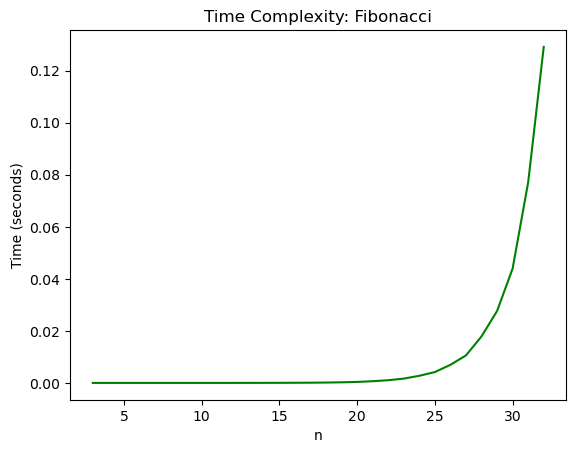

In [17]:
x = []
y1 = []

n = 2
for i in range(30):
    test_array = createRandomUnSortedList(50, 0, 100)
    
    start_time = time.time()
    fibonacci(n)
    y1.append(time.time() - start_time)
    

    n+=1
    x.append(n)

# Plot results
plt.plot(x, y1, color='g')
plt.xlabel("n")
plt.ylabel("Time (seconds)")
plt.title("Time Complexity: Fibonacci")
plt.show()


### Factorial complexity
   
What is this code doing ? Evaluate its complexity.            

In [18]:
def heap_permutation(data, n, res):
    if n == 1:
        res.append(data.copy())
        return
    
    for i in range(n):
        heap_permutation(data, n - 1, res)
        if n % 2 == 0:
            data[i], data[n-1] = data[n-1], data[i]
        else:
            data[0], data[n-1] = data[n-1], data[0]

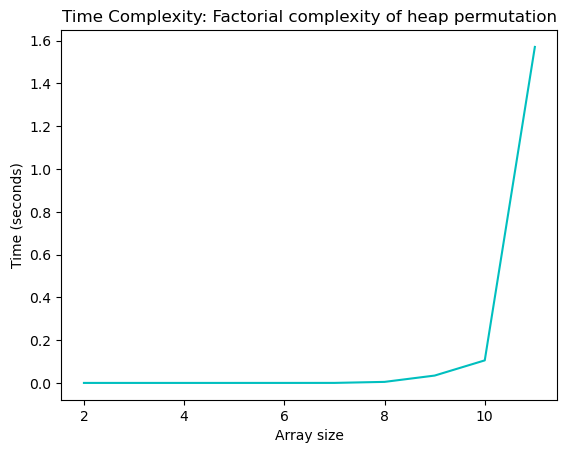

In [19]:
x = []
y1 = []

n = 1


for i in range(10):
    test_array = createRandomUnSortedList(n, 0, 10)
    random_value = random.randint(0, 10)
    res = []
    start_time = time.time()
    heap_permutation(test_array, n, res)
    y1.append(time.time() - start_time)
    

    n+=1
    x.append(n)

# Plot results
plt.plot(x, y1, color='c')
plt.xlabel("Array size")
plt.ylabel("Time (seconds)")
plt.title("Time Complexity: Factorial complexity of heap permutation")
plt.show()

For impatience reasons, I used a small amount of arrays and values. 

This algorithm generates all possible permutations of an array, and its complexity is factorial. Therefore, testing it on big numbers would take a lot of time.

## Exercises

### Exercise 1

Program and compare the running time of the fast powering algorithm and the naive power algorithm (see Recitation 2)

In [20]:
def puiss(a,n):
    A = a
    N = n
    R = 1
    while N > 0 :
        if (N%2==0):
            A = A*A
            N = N/2
        else:
            R = R*A
            N-=1
    return R

def naivePuiss(a,n):
    R = 1
    for i in range (n):
        R = R*a
    return R


### Tests

In [21]:
print("fast : ",puiss(10,300))
print("slow : ",naivePuiss(10,300))

fast :  1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
slow :  1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


### Comparison of both algorithms :

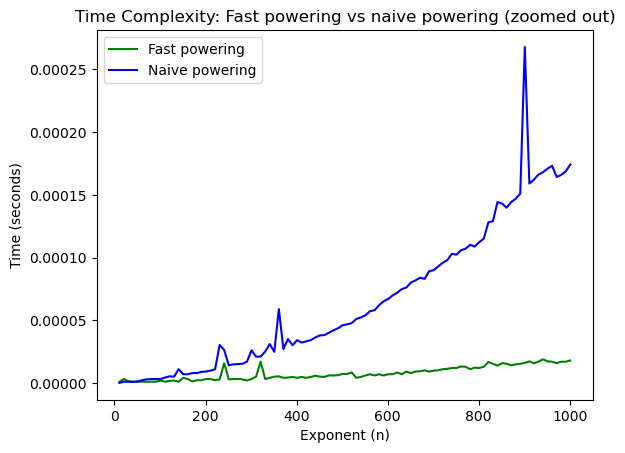

In [22]:
x = []
y1 = []
y2 = []

n = 1


for i in range(100):
    a = 100
    
    start_time = time.time()
    puiss(a, n)
    y1.append(time.time() - start_time)

    start_time = time.time()
    naivePuiss(a, n)
    y2.append(time.time() - start_time)
    
    

    n+=10
    x.append(n)

# Plot results
plt.plot(x, y1, color='g', label="Fast powering")
plt.plot(x, y2, color='b', label="Naive powering")
plt.xlabel("Exponent (n)")
plt.ylabel("Time (seconds)")
plt.title("Time Complexity: Fast powering vs naive powering (zoomed out)")
plt.legend()
plt.show()

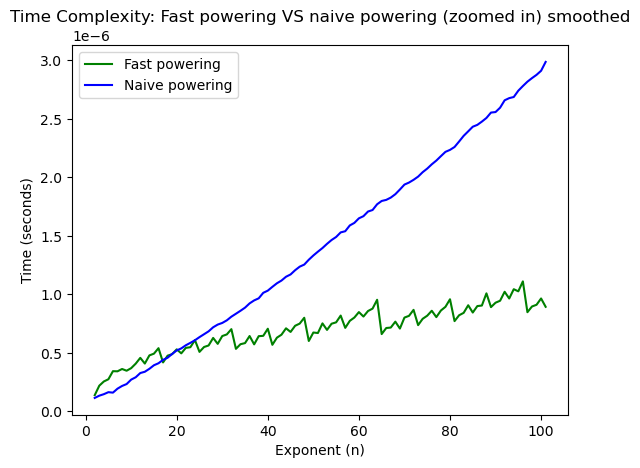

In [23]:
x = []
y1 = []
y2 = []

n = 1
repeat = 10000


for i in range(100):
    a = 100
    
    total_time_puiss = 0
    for j in range (repeat):
        start_time = time.time()
        puiss(a, n)
        total_time_puiss += time.time() - start_time
    y1.append(total_time_puiss / repeat)

    total_time_naive = 0
    for j in range (repeat):
        start_time = time.time()
        naivePuiss(a, n)
        total_time_naive += time.time() - start_time
    y2.append(total_time_naive / repeat)
    
    

    n+=1
    x.append(n)

# Plot results
plt.plot(x, y1, color='g', label="Fast powering")
plt.plot(x, y2, color='b', label="Naive powering")
plt.xlabel("Exponent (n)")
plt.ylabel("Time (seconds)")
plt.title("Time Complexity: Fast powering VS naive powering (zoomed in) smoothed")
plt.legend()
plt.show()

We can also conclude, similarly to the case of the selection and merge sort, that the fast powering algorithm can be slower for smaller values (because it has more elementary operations), but is on the long run way more efficient.

### Exercise 2

Implement Quick sort algorithm (see https://www.khanacademy.org/computing/computer-science/algorithms/quick-sort/a/analysis-of-quicksort) and compare its running time with Merge sort on different examples of random arrays

In [24]:
def partition(A, lo, hi):
    pivot_index = random.randint(lo, hi)
    A[pivot_index], A[hi] = A[hi], A[pivot_index]
    pivot = A[hi]
    i = lo
    for j in range(lo, hi):
        if A[j] <= pivot:
            A[i], A[j] = A[j], A[i]
            i += 1
    A[i], A[hi] = A[hi], A[i]
    return i

def quickSort(A, lo, hi):
    if lo >= hi or lo < 0:
        return
    p = partition(A, lo, hi)
    quickSort(A, lo, p - 1)
    quickSort(A, p + 1, hi)

### Tests

In [25]:
size = 100
test_array = createRandomUnSortedList(size, 0, 1000)
print("before quick sort: ",test_array)
quickSort(test_array, 0, size-1)
print("test quick sort: ",test_array)


before quick sort:  [247, 900, 364, 341, 616, 656, 153, 670, 55, 21, 51, 8, 691, 213, 359, 572, 80, 632, 958, 22, 9, 758, 533, 297, 868, 293, 42, 121, 280, 157, 966, 751, 783, 435, 525, 737, 575, 807, 711, 154, 703, 735, 231, 929, 105, 774, 77, 345, 415, 30, 201, 707, 599, 839, 233, 409, 816, 189, 279, 484, 792, 597, 766, 819, 989, 424, 500, 569, 688, 727, 90, 602, 150, 850, 573, 186, 761, 418, 698, 622, 682, 897, 553, 325, 684, 510, 110, 508, 427, 702, 24, 548, 677, 891, 660, 57, 581, 41, 84, 491]
test quick sort:  [8, 9, 21, 22, 24, 30, 41, 42, 51, 55, 57, 77, 80, 84, 90, 105, 110, 121, 150, 153, 154, 157, 186, 189, 201, 213, 231, 233, 247, 279, 280, 293, 297, 325, 341, 345, 359, 364, 409, 415, 418, 424, 427, 435, 484, 491, 500, 508, 510, 525, 533, 548, 553, 569, 572, 573, 575, 581, 597, 599, 602, 616, 622, 632, 656, 660, 670, 677, 682, 684, 688, 691, 698, 702, 703, 707, 711, 727, 735, 737, 751, 758, 761, 766, 774, 783, 792, 807, 816, 819, 839, 850, 868, 891, 897, 900, 929, 958, 966,

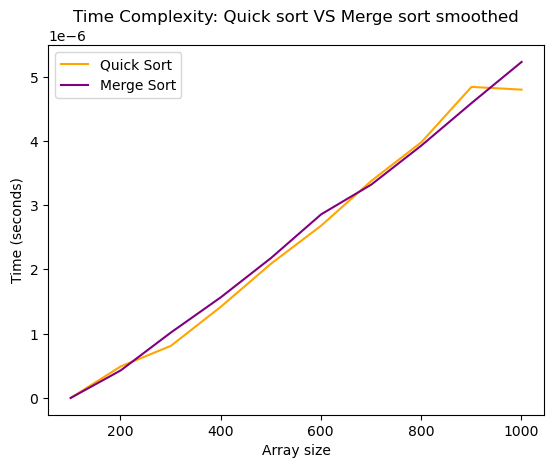

In [26]:
x = []
y1 = []
y2 = []

n = 1
repeat = 100


for i in range(10):
    test_array = createRandomUnSortedList(n, 0, 2000)

    total_time_qs = 0
    for j in range (repeat):
        start_time = time.time()
        quickSort(test_array, 0, n-1)
        total_time_qs = time.time() - start_time
    y1.append(total_time_qs/repeat)

    total_time_ms = 0
    for j in range (repeat):
        start_time = time.time()
        mergeSort(test_array)
        total_time_ms = time.time() - start_time
    y2.append(total_time_ms/repeat)
    
    

    n+=100
    x.append(n)

# Plot results
plt.plot(x, y1, color='orange', label="Quick Sort")
plt.plot(x, y2, color='purple', label="Merge Sort")
plt.xlabel("Array size")
plt.ylabel("Time (seconds)")
plt.title("Time Complexity: Quick sort VS Merge sort smoothed")
plt.legend()
plt.show()

As both have the same average time complexity of $O(n.log{n})$, it makes sense that the curves are pretty similar.

### Exercise 3

Implement a function that compute the product of two $n\times n$ matrices using the naive algorithm introduced in linear algebra class. Then implement Strassen algorithm as given in Recitation 2. Generate some random $n\times n$ matrices and find out for which value of $n$, Strassen algorithm is better that the naive algorithm.

### Naive algorithm and tests

In [ ]:
def naiveMatricesProduct(A, B):
    n = len (A)
    res = [[0 for x in range(n)] for y in range(n)]
    for i in range (n):
        for j in range (n):
            for k in range (n):
                res[i][j] += A[i][k] * B[j][k]
    return res



naiveMatricesProduct(m3,m3)

[[3, 3, 3], [3, 3, 3], [3, 3, 3]]

### Strassen algorithm (ChatGPT)

In [47]:
def add_matrix(A, B):
    n = len(A)
    return [[A[i][j] + B[i][j] for j in range(n)] for i in range(n)]

def sub_matrix(A, B):
    n = len(A)
    return [[A[i][j] - B[i][j] for j in range(n)] for i in range(n)]

def strassen(A, B):
    n = len(A)
    
    # Base case: use naive multiplication for 1x1 matrices
    if n == 1:
        return [[A[0][0] * B[0][0]]]

    # Divide matrices into quarters
    mid = n // 2
    A11 = [row[:mid] for row in A[:mid]]
    A12 = [row[mid:] for row in A[:mid]]
    A21 = [row[:mid] for row in A[mid:]]
    A22 = [row[mid:] for row in A[mid:]]

    B11 = [row[:mid] for row in B[:mid]]
    B12 = [row[mid:] for row in B[:mid]]
    B21 = [row[:mid] for row in B[mid:]]
    B22 = [row[mid:] for row in B[mid:]]

    # Compute 7 products using Strassen's method
    M1 = strassen(add_matrix(A11, A22), add_matrix(B11, B22))
    M2 = strassen(add_matrix(A21, A22), B11)
    M3 = strassen(A11, sub_matrix(B12, B22))
    M4 = strassen(A22, sub_matrix(B21, B11))
    M5 = strassen(add_matrix(A11, A12), B22)
    M6 = strassen(sub_matrix(A21, A11), add_matrix(B11, B12))
    M7 = strassen(sub_matrix(A12, A22), add_matrix(B21, B22))

    # Combine the 4 quadrants of the result matrix
    C11 = add_matrix(sub_matrix(add_matrix(M1, M4), M5), M7)
    C12 = add_matrix(M3, M5)
    C21 = add_matrix(M2, M4)
    C22 = add_matrix(sub_matrix(add_matrix(M1, M3), M2), M6)

    # Merge submatrices
    C = [[0] * n for _ in range(n)]
    for i in range(mid):
        for j in range(mid):
            C[i][j] = C11[i][j]
            C[i][j + mid] = C12[i][j]
            C[i + mid][j] = C21[i][j]
            C[i + mid][j + mid] = C22[i][j]

    return C


In [67]:
def generate_random_matrix(n, min_val=0, max_val=10):
    return [[random.randint(min_val, max_val) for _ in range(n)] for _ in range(n)]
n = 2*64  # matrix size
A = generate_random_matrix(n, 0, 200)
B = generate_random_matrix(n, 0, 200)


### Tests

In [ ]:

C = strassen(A, B)
print("Strassen product:")
for row in C:
    print(row)

naiveMatricesProduct(A,B)

Strassen product:
[1160187, 1296381, 1248297, 1191920, 1227782, 1202612, 1171230, 1199817, 1179444, 1279029, 1278379, 1283249, 1191692, 1182677, 1253860, 1166192, 1161203, 1263294, 1200871, 1212738, 1146700, 1299824, 1222756, 1334984, 1291073, 1218658, 1249302, 1313954, 1235266, 1306382, 1202850, 1045090, 1093398, 1186137, 1238897, 1199285, 1230369, 1198986, 1046356, 1173867, 1255455, 1200990, 1271766, 1124814, 1250665, 1188916, 1255924, 1244183, 1298973, 1177850, 1180998, 1211080, 1192717, 1093681, 1288200, 1291382, 1119209, 1238261, 1116196, 1136755, 1306496, 1233573, 1179166, 1072027, 1122553, 1238774, 1302942, 1197628, 1174219, 1374404, 1127152, 1320013, 1275981, 1321491, 1242092, 1137074, 1179447, 1181492, 1207393, 1170753, 1168684, 1289952, 1216125, 1297474, 1114704, 1258549, 1245068, 1218935, 1221758, 1095393, 1193821, 1239803, 1325600, 1169916, 1269414, 1270989, 1322295, 1293776, 1098953, 1246594, 1312899, 1246709, 1225918, 1297208, 1250157, 1165698, 1281726, 1221262, 1204885, 

[[1152972,
  1281560,
  1079054,
  1239183,
  1139708,
  1222965,
  1163988,
  1349923,
  1167179,
  1278751,
  1195633,
  1213175,
  1295659,
  1259545,
  1168918,
  1080591,
  1226904,
  1282718,
  1208426,
  1165202,
  1224327,
  1206476,
  1213691,
  1194042,
  1225284,
  1270256,
  1225118,
  1311008,
  1272933,
  1246344,
  1225759,
  1263573,
  1143997,
  1303457,
  1175281,
  1097365,
  1135174,
  1248844,
  1224583,
  1105295,
  1335439,
  1303151,
  1326249,
  1149875,
  1265711,
  1172040,
  1229677,
  1204073,
  1315788,
  1231748,
  1169227,
  1296042,
  1198459,
  1240178,
  1177181,
  1236743,
  1171390,
  1152877,
  1187423,
  1194107,
  1260045,
  1368017,
  1231731,
  1101207,
  1228189,
  1359135,
  1211171,
  1182114,
  1197545,
  1302386,
  1226225,
  1179441,
  1169165,
  1236858,
  1176705,
  1261788,
  1179280,
  1237085,
  1271426,
  1132992,
  1139017,
  1144579,
  1216707,
  1236886,
  1077411,
  1255819,
  1211250,
  1347389,
  1250592,
  1180185,
  1016793,

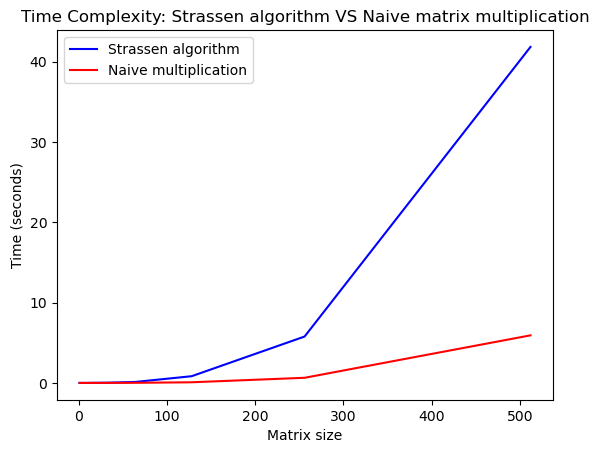

In [86]:
x = []
y1 = []
y2 = []


for i in range(10):
    n=2**i
    A = generate_random_matrix(n, 0, 200)
    B = generate_random_matrix(n, 0, 200)

    total_time_np = 0
    start_time = time.time()
    naiveMatricesProduct(A, B)
    total_time_np = time.time() - start_time
    y2.append(total_time_np)

    total_time_st = 0
    start_time = time.time()
    strassen(A, B)
    total_time_st = time.time() - start_time
    y1.append(total_time_st)
    
    x.append(n)


plt.plot(x, y1, color='blue', label="Strassen algorithm")
plt.plot(x, y2, color='red', label="Naive multiplication")
plt.xlabel("Matrix size")
plt.ylabel("Time (seconds)")
plt.title("Time Complexity: Strassen algorithm VS Naive matrix multiplication")
plt.legend()
plt.show()

After 1min of execution, we can conclude that this result is clearly not normal, as the naive multiplication is supposed to be slower than the Strassen algorithm with such big matrices, and it's the total opposite that we're seeing. 

Hypothesis : Python can't handle well big matrices and the Stressen Algorithm manipulates them too many times, which probably make the algorithm slower than it would be with, for example, numpy matrices. Let's try to use them. 

Remade with numpy matrices + threshold for recursion :

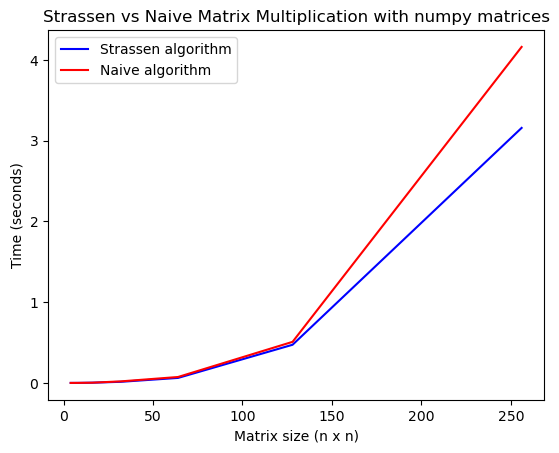

In [90]:
def naive_matrix_product_numpy(A, B):
    n = A.shape[0]
    C = np.zeros((n, n), dtype=A.dtype)
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C

def add(A, B):
    return A + B

def subtract(A, B):
    return A - B

def strassen_numpy(A, B, threshold=64):
    n = A.shape[0]

    if n <= threshold:
        return naive_matrix_product_numpy(A, B)

    mid = n // 2

    A11 = A[:mid, :mid]
    A12 = A[:mid, mid:]
    A21 = A[mid:, :mid]
    A22 = A[mid:, mid:]

    B11 = B[:mid, :mid]
    B12 = B[:mid, mid:]
    B21 = B[mid:, :mid]
    B22 = B[mid:, mid:]

    M1 = strassen_numpy(add(A11, A22), add(B11, B22), threshold)
    M2 = strassen_numpy(add(A21, A22), B11, threshold)
    M3 = strassen_numpy(A11, subtract(B12, B22), threshold)
    M4 = strassen_numpy(A22, subtract(B21, B11), threshold)
    M5 = strassen_numpy(add(A11, A12), B22, threshold)
    M6 = strassen_numpy(subtract(A21, A11), add(B11, B12), threshold)
    M7 = strassen_numpy(subtract(A12, A22), add(B21, B22), threshold)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    C = np.zeros((n, n), dtype=A.dtype)
    C[:mid, :mid] = C11
    C[:mid, mid:] = C12
    C[mid:, :mid] = C21
    C[mid:, mid:] = C22

    return C

sizes = [2**i for i in range(2, 9)]
naive_times = []
strassen_times = []

for n in sizes:
    A = np.random.randint(0, 10, size=(n, n))
    B = np.random.randint(0, 10, size=(n, n))

    start = time.perf_counter()
    naive_matrix_product_numpy(A, B)
    naive_times.append(time.perf_counter() - start)

    start = time.perf_counter()
    strassen_numpy(A, B)
    strassen_times.append(time.perf_counter() - start)

plt.plot(sizes, strassen_times, label="Strassen algorithm", color="blue")
plt.plot(sizes, naive_times, label="Naive algorithm", color="red")
plt.xlabel("Matrix size (n x n)")
plt.ylabel("Time (seconds)")
plt.title("Strassen vs Naive Matrix Multiplication with numpy matrices")
plt.legend()
plt.show()


After making the matricies with numpy, we can effectively see that the Strassen algorithm is slightly more efficient than the naive alternative. The problem was actually the matrices which were to large for Python to handle.